In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [26]:
%matplotlib inline

In [42]:
ale_df = pd.read_csv("../Data/Growth_data/evolved-isolate-growth-data/Evolved_isolates_data_frame.tsv", sep="\t")

In [43]:
recon_df = pd.read_csv("../Data/Growth_data/Reconstructions/Reconstruction_replicate_growth.csv", index_col=0)

comp_list = ["HMDA", "PUTR", "12PD", "23BD", "GLUT", "ADIP", "HEXA", "OCTA", "IBUA", "COUM", "BUT"]
for comp in comp_list:
    recon_df = recon_df[~recon_df["strain"].str.startswith(comp)]
    
recon_df["replicate"] = recon_df["strain"]
recon_df["strain"] = recon_df["replicate"].map(lambda x: x[:-2])

In [44]:
plt.rcParams['svg.fonttype'] = 'none'

In [56]:
#metJ strain deletions

recon_df=recon_df.drop(index=recon_df[recon_df.strain=='metJ-lg'].index)
recon_df=recon_df.drop(index=recon_df[recon_df.strain=='metJ-sm'].index)

In [46]:
#Remove errorneous growth rate

recon_df=recon_df.drop(index=[1031, 1040, 1041, 1030, 1034, 1045, 393])

In [47]:
recon_df_drop = recon_df.copy()

In [48]:
recon_df_temp=recon_df.copy()

In [49]:
recon_df=recon_df_drop

In [50]:
total_tested_gene = pd.DataFrame(recon_df['strain'])

In [51]:
len(set(total_tested_gene.strain.str.split('_', expand=True)[0].unique()).union(set(total_tested_gene.strain.str.split('_', expand=True)[1].unique())).union(
set(total_tested_gene.strain.str.split('_', expand=True)[2].unique())))-2 #MG1655 and none

60

In [52]:
def prettify(s):
    if s == s.upper():
        return s
    else:
        return s.capitalize()

In [53]:
total_comp_order = [
    "1,2-propanediol", "2,3-butanediol","glutarate", "adipate", "putrescine",  "HMDA", 
    "isobutyrate", "coumarate",  "butanol", "octanoate" , "hexanoate"
]

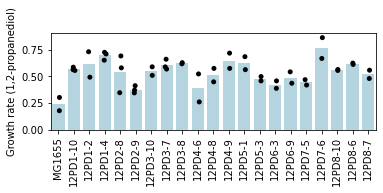

In [54]:
comp_order=["1,2-propanediol"]
plt.figure(figsize=[10, 13])

for i, comp in enumerate(comp_order):
    plt.subplot(6, 2, (i % 12)+1)
    comp_df = ale_df[ale_df["compound"] == comp]
    comp_df = comp_df[comp_df["growth_rate"] != 0]
    comp_df = pd.concat([
        comp_df[comp_df["strain"] == "MG1655"],
        comp_df[comp_df["strain"] != "MG1655"].sort_values("strain")
    ])

    sbn.barplot(x="strain", y="growth_rate", data=comp_df, errwidth=0, color="lightblue")
    plt.xticks(rotation=90)
    sbn.stripplot(x="strain", y="growth_rate", data=comp_df, color="black")
    plt.xlabel("")
    plt.ylabel("Growth rate ({})".format(prettify(comp)))

plt.tight_layout()
plt.savefig("../Plots/Supplementary Figure 5 - Evolved tolerance.pdf")

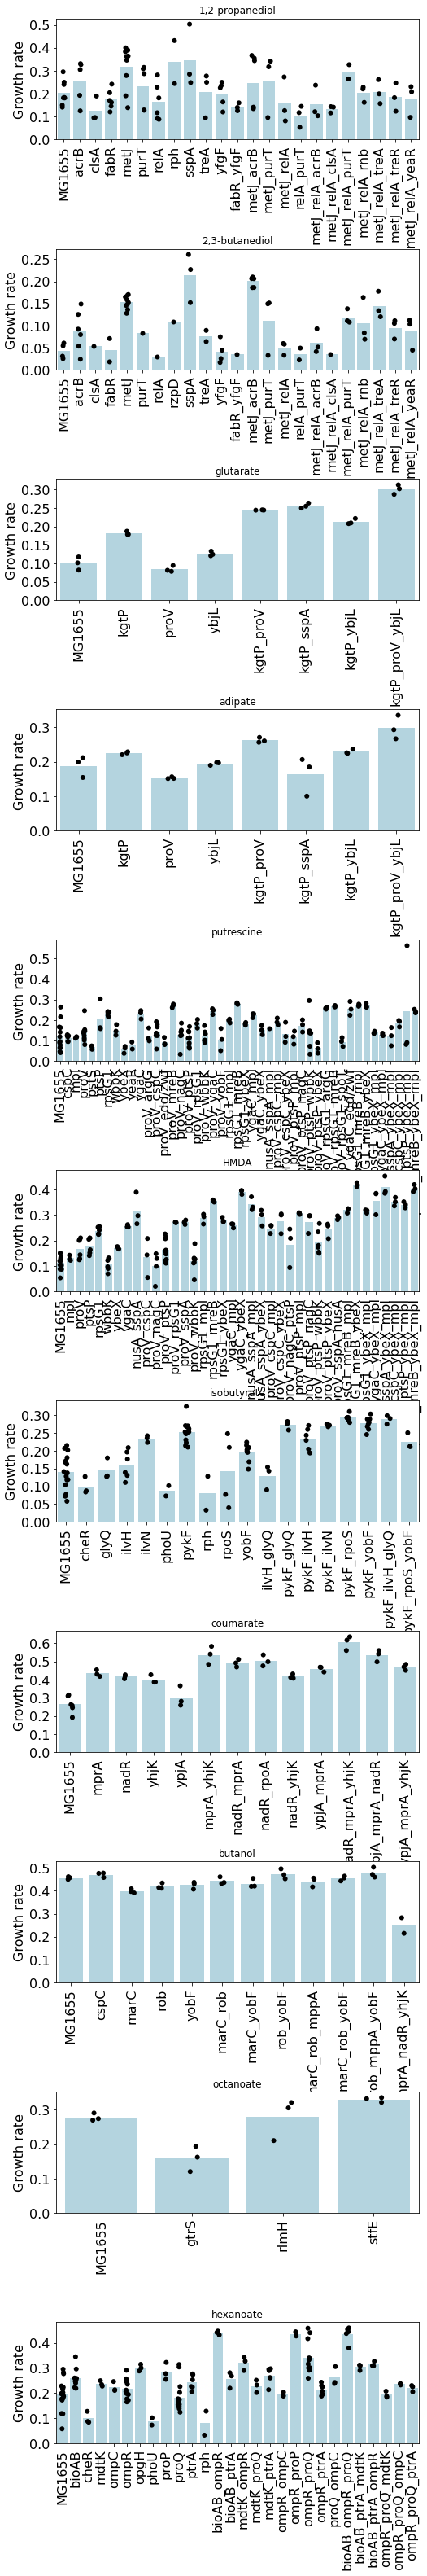

In [58]:
comp_order=total_comp_order

plt.figure(figsize=[8, 60])

for i, comp in enumerate(comp_order):
    plt.subplot(12, 1, (i % 12)+1)
    comp_df = recon_df[recon_df["compound"] == comp]
    comp_df = comp_df[comp_df["slope"] != 0]
    comp_df = pd.concat([
        comp_df[comp_df["strain"] == "MG1655"],
        comp_df[comp_df["strain"] != "MG1655"].sort_values("strain")
    ])
    
    #Re-ordering strains
    for i in comp_df.index:
        if comp_df.loc[i, 'strain']=="MG1655":
            comp_df.loc[i, 'order']=int(0)
        else:
            comp_df.loc[i,'order']=comp_df.loc[i, 'strain'].count('_')+1
    
    comp_df=comp_df.sort_values(by=['order','strain'])

    sbn.barplot(x="strain", y="slope", data=comp_df, errwidth=0, color="lightblue")
    plt.xticks(rotation=90, fontsize=16)
    sbn.stripplot(x="strain", y="slope", data=comp_df, color="black", size=6)
    plt.xlabel("")
    plt.ylabel("Growth rate", fontsize=16)
    plt.yticks(fontsize=16)
    plt.title(comp)

    
plt.subplots_adjust(hspace=0.9)
# plt.tight_layout()
plt.savefig("../Plots/Supplementary Figure 6 - Reconstructed tolerance.svg")

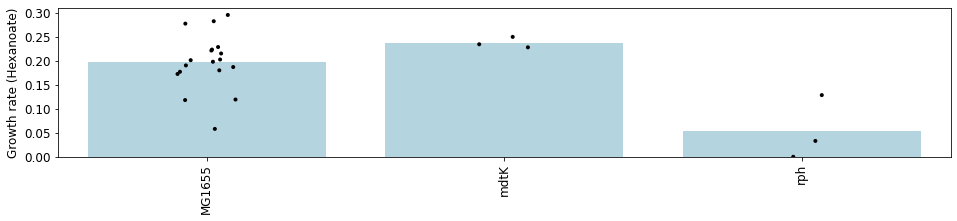

In [18]:
comp_order=["hexanoate"]

#comp_order=total_comp_order

plt.figure(figsize=[16, 60])

for i, comp in enumerate(comp_order):
    plt.subplot(12, 1, (i % 12)+1)
    comp_df = recon_df[recon_df["compound"] == comp]
    # comp_df = comp_df[comp_df["growth_rate"] != 0]
    comp_df = pd.concat([
        comp_df[comp_df["strain"] == "MG1655"],
        comp_df[comp_df["strain"] != "MG1655"].sort_values("strain")
    ])

    sbn.barplot(x="strain", y="slope", data=comp_df, errwidth=0, color="lightblue")
    plt.xticks(rotation=90, fontsize=12)
    sbn.stripplot(x="strain", y="slope", data=comp_df, color="black", size=4)
    plt.xlabel("")
    plt.ylabel("Growth rate ({})".format(prettify(comp)), fontsize=12)
    plt.yticks(fontsize=12)

    
plt.subplots_adjust(hspace=0.9)
# plt.tight_layout()
plt.savefig("../Plots/Supplementary Figure 6 - Reconstructed tolerance.svg")

In [88]:
less_plus_wt=less_frequency_mutation.append('MG1655')

In [90]:
less_plus_wt

['acrB',
 'clsA',
 'fabR',
 'treA',
 'yfgF',
 'rzpD',
 'mpl',
 'wbbK',
 'ybeX',
 'ygaC',
 'cheR',
 'glyQ',
 'ilvH',
 'ilvN',
 'phoU',
 'yhjK',
 'ypjA',
 'stfE',
 'rlmH',
 'bioAB',
 'ompC',
 'ompR',
 'opgH',
 'proP',
 'proQ',
 'ptrA',
 'argG',
 'edd/zwf',
 'treR',
 'mppA',
 'MG1655',
 'MG1655',
 'MG1655',
 'MG1655']

In [97]:
ununique=recon_df[recon_df['strain'].isin(less_frequency_mutation)]

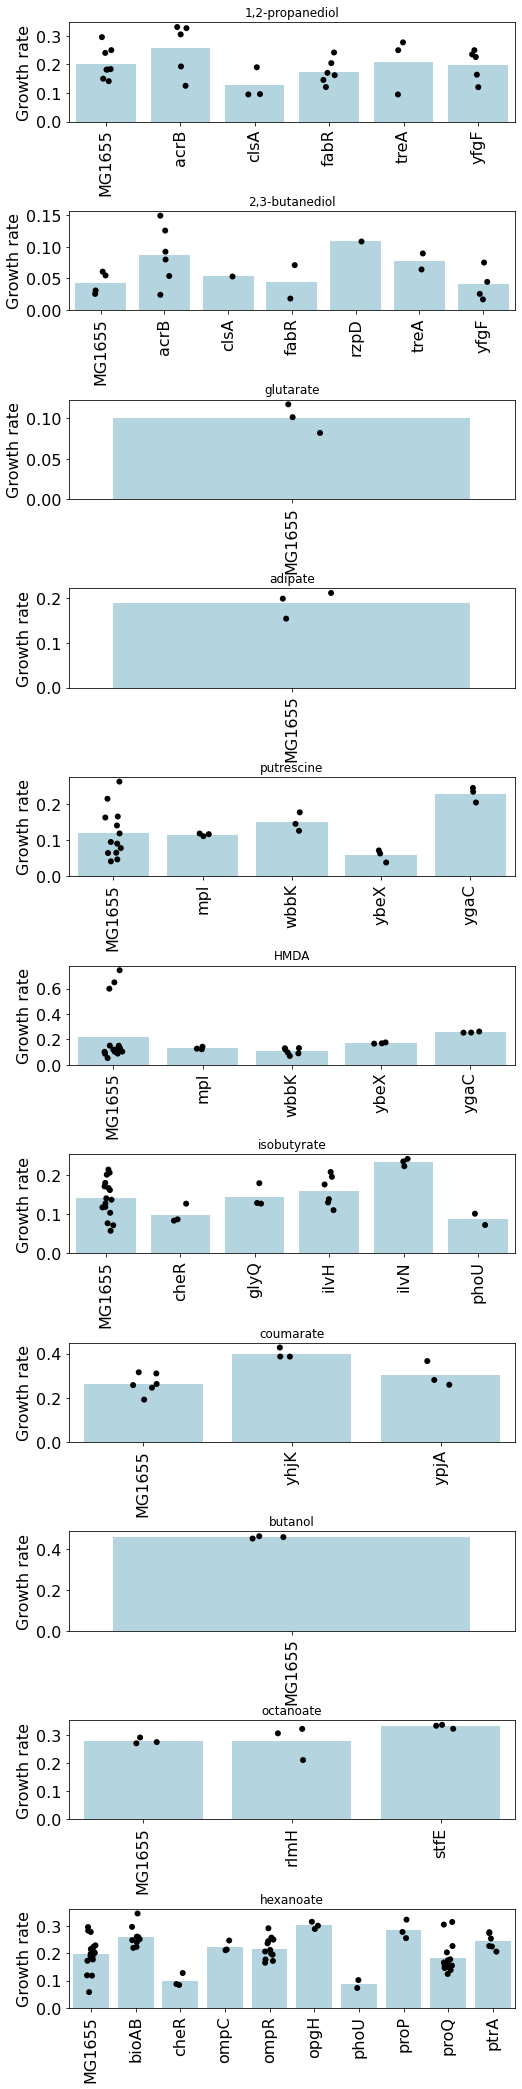

In [131]:
comp_order=total_comp_order

plt.figure(figsize=[8, 40])

for i, comp in enumerate(comp_order):
    plt.subplot(12, 1, (i % 12)+1)
    comp_df = ununique[ununique["compound"] == comp]
    comp_df = comp_df[comp_df["slope"] != 0]
    comp_df = pd.concat([
        comp_df[comp_df["strain"] == "MG1655"],
        comp_df[comp_df["strain"] != "MG1655"].sort_values("strain")
    ])
    
    #Re-ordering strains
    for i in comp_df.index:
        if comp_df.loc[i, 'strain']=="MG1655":
            comp_df.loc[i, 'order']=int(0)
        else:
            comp_df.loc[i,'order']=comp_df.loc[i, 'strain'].count('_')+1
    
    comp_df=comp_df.sort_values(by=['order','strain'])

    sbn.barplot(x="strain", y="slope", data=comp_df, errwidth=0, color="lightblue")
    plt.xticks(rotation=90, fontsize=16)
    sbn.stripplot(x="strain", y="slope", data=comp_df, color="black", size=6)
    plt.xlabel("")
    plt.ylabel("Growth rate", fontsize=16)
    plt.yticks(fontsize=16)
    plt.title(comp)

    
plt.subplots_adjust(hspace=0.9)
# plt.tight_layout()
plt.savefig("../Plots/Supplementary Figure 6 - Reconstructed tolerance_non_common.svg")

In [96]:
ununique

,strain,compound,slope,replicate,order


In [95]:
comp

'2,3-butanediol'

In [70]:
'acrB'.isin(less_frequency_mutation)


AttributeError: 'str' object has no attribute 'isin'

In [ ]:
less_frequency_mutation=[
'acrB',
'clsA',
'fabR',
'treA',
'yfgF',
'rzpD',
'mpl',
'wbbK',
'ybeX',
'ygaC',
'cheR',
'glyQ',
'ilvH',
'ilvN',
'phoU',
'yhjK',
'ypjA',
'stfE',
'rlmH',
'bioAB',
'ompC',
'ompR',
'opgH',
'proP',
'proQ',
'ptrA',
'argG',
'edd/zwf',
'treR',
'mppA',
]

In [ ]:
comp_order=["coumarate"]

plt.figure(figsize=[12, 80])

for i, comp in enumerate(comp_order):
    plt.subplot(12, 1, (i % 12)+1)
    comp_df = recon_df[recon_df["compound"] == comp]
    # comp_df = comp_df[comp_df["growth_rate"] != 0]
    comp_df = pd.concat([
        comp_df[comp_df["strain"] == "MG1655"],
        comp_df[comp_df["strain"] != "MG1655"].sort_values("strain")
    ])

    sbn.barplot(x="strain", y="slope", data=comp_df, errwidth=0, color="lightblue")
    plt.xticks(rotation=90, fontsize=12)
    sbn.stripplot(x="strain", y="slope", data=comp_df, color="black", size=4)
    plt.xlabel("")
    plt.ylabel("Growth rate ({})".format(prettify(comp)), fontsize=8)
    plt.yticks(fontsize=12)

    
plt.subplots_adjust(hspace=0.9)
# plt.tight_layout()
plt.savefig("../Plots/Supplementary Figure 6 - Reconstructed tolerance.pdf")
plt.savefig("../Plots/Supplementary Figure 6 - Reconstructed tolerance.svg")

In [ ]:
comp_order=["glutarate"]
plt.figure(figsize=[16, 80])

for i, comp in enumerate(comp_order):
    plt.subplot(12, 1, (i % 12)+1)
    comp_df = recon_df[recon_df["compound"] == comp]
    # comp_df = comp_df[comp_df["growth_rate"] != 0]
    comp_df = pd.concat([
        comp_df[comp_df["strain"] == "MG1655"],
        comp_df[comp_df["strain"] != "MG1655"].sort_values("strain")
    ])

    sbn.barplot(x="strain", y="slope", data=comp_df, errwidth=0, color="lightblue")
    plt.xticks(rotation=90, fontsize=12)
    sbn.stripplot(x="strain", y="slope", data=comp_df, color="black", size=4)
    plt.xlabel("")
    plt.ylabel("Growth rate ({})".format(prettify(comp)), fontsize=8)
    plt.yticks(fontsize=12)

    
plt.subplots_adjust(hspace=0.9)
# plt.tight_layout()
plt.savefig("../Plots/Supplementary Figure 6 - Reconstructed tolerance.pdf")
plt.savefig("../Plots/Supplementary Figure 6 - Reconstructed tolerance.svg")

In [ ]:
comp_order=["HMDA"]
plt.figure(figsize=[16, 80])

for i, comp in enumerate(comp_order):
    plt.subplot(12, 1, (i % 12)+1)
    comp_df = recon_df[recon_df["compound"] == comp]
    # comp_df = comp_df[comp_df["growth_rate"] != 0]
    comp_df = pd.concat([
        comp_df[comp_df["strain"] == "MG1655"],
        comp_df[comp_df["strain"] != "MG1655"].sort_values("strain")
    ])

    sbn.barplot(x="strain", y="slope", data=comp_df, errwidth=0, color="lightblue")
    plt.xticks(rotation=90, fontsize=12)
    sbn.stripplot(x="strain", y="slope", data=comp_df, color="black", size=4)
    plt.xlabel("")
    plt.ylabel("Growth rate ({})".format(prettify(comp)), fontsize=8)
    plt.yticks(fontsize=12)

    
plt.subplots_adjust(hspace=0.9)
# plt.tight_layout()
plt.savefig("../Plots/Supplementary Figure 6 - Reconstructed tolerance.pdf")
plt.savefig("../Plots/Supplementary Figure 6 - Reconstructed tolerance.svg")

In [ ]:
comp_order=["octanoate"]
plt.figure(figsize=[16, 80])

for i, comp in enumerate(comp_order):
    plt.subplot(12, 1, (i % 12)+1)
    comp_df = recon_df[recon_df["compound"] == comp]
    # comp_df = comp_df[comp_df["growth_rate"] != 0]
    comp_df = pd.concat([
        comp_df[comp_df["strain"] == "MG1655"],
        comp_df[comp_df["strain"] != "MG1655"].sort_values("strain")
    ])

    sbn.barplot(x="strain", y="slope", data=comp_df, errwidth=0, color="lightblue")
    plt.xticks(rotation=90, fontsize=12)
    sbn.stripplot(x="strain", y="slope", data=comp_df, color="black", size=4)
    plt.xlabel("")
    plt.ylabel("Growth rate ({})".format(prettify(comp)), fontsize=8)
    plt.yticks(fontsize=12)

    
plt.subplots_adjust(hspace=0.9)
# plt.tight_layout()
plt.savefig("../Plots/Supplementary Figure 6 - Reconstructed tolerance.pdf")
plt.savefig("../Plots/Supplementary Figure 6 - Reconstructed tolerance.svg")

In [ ]:
comp_df.groupby('strain').mean().sort_values(by='slope', ascending=False)

In [ ]:
len(comp_df.strain.unique())

In [ ]:
comp_df.sort_values(by='strain').strain.unique()

In [ ]:
i='MG1655'

In [ ]:
comp_df_avg = pd.DataFrame()

In [ ]:
for i in comp_df.strain.unique():
    comp_df_avg.loc[i,'growth_rate']=comp_df[comp_df.strain==i].slope.mean()   


In [ ]:
comp_df_avg=comp_df_avg.sort_values(by='growth_rate', ascending=False)

In [ ]:
temp=pd.DataFrame(index=comp_df_avg.index)

In [ ]:
for i in temp.index:
    if(i[0:4]=='proV'):
        temp.loc[i,'leave']=True
    else:
        temp.loc[i,'leave']=False


In [ ]:
temp=temp[temp.leave==True]

In [ ]:
temp

In [ ]:
comp_df_avg=comp_df_avg

In [ ]:
comp_df_avg.head(20).index

In [ ]:
comp_df_sorted=comp_df[comp_df.strain.isin(temp.index)]


In [ ]:
comp_df_sorted=comp_df[comp_df.strain.isin(comp_df_avg.head(20).index)]

comp_df_sorted=pd.concat(p)

In [ ]:
plt.figure(figsize=[8, 4])

sbn.barplot(x="strain", y="slope", data=comp_df_sorted, errwidth=0, color="lightblue")
plt.xticks(rotation=90, fontsize=12)
sbn.stripplot(x="strain", y="slope", data=comp_df_sorted, color="black", size=4)
plt.xlabel("")
plt.ylabel("Growth rate ({})".format(prettify(comp)), fontsize=8)
plt.yticks(fontsize=12)

plt.subplots_adjust(hspace=0.9)

    

In [ ]:
plt.figure(figsize=[16, 80])

for i, comp in enumerate(comp_order):
    plt.subplot(12, 1, (i % 12)+1)
    comp_df = recon_df[recon_df["compound"] == comp]
    # comp_df = comp_df[comp_df["growth_rate"] != 0]
    comp_df = pd.concat([
        comp_df[comp_df["strain"] == "MG1655"],
        comp_df[comp_df["strain"] != "MG1655"].sort_values("strain")
    ])

    sbn.barplot(x="strain", y="slope", data=comp_df, errwidth=0, color="lightblue")
    plt.xticks(rotation=90, fontsize=12)
    sbn.stripplot(x="strain", y="slope", data=comp_df, color="black", size=4)
    plt.xlabel("")
    plt.ylabel("Growth rate ({})".format(prettify(comp)), fontsize=8)
    plt.yticks(fontsize=12)

    
plt.subplots_adjust(hspace=0.9)
# plt.tight_layout()
plt.savefig("../Plots/Supplementary Figure 6 - Reconstructed tolerance.pdf")
plt.savefig("../Plots/Supplementary Figure 6 - Reconstructed tolerance.svg")